In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Google_Stock_Price_Train.csv')
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
df=df.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() 

In [5]:
df = sc.fit_transform(df)

In [6]:
X_train = df[0:1257]
y_train = df[1:1258]

In [7]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))

In [10]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 9s 5ms/step - loss: 0.2016
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.1399
Epoch 3/200
40/40 [==============================] - 0s 8ms/step - loss: 0.1019
Epoch 4/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0811
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0711
Epoch 6/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0664
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0642
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0626
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0611
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0597
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0582
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0567
Epoch 13/200
40/40 [=================

In [11]:
test_set = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = test_set.iloc[:,1:2].values

In [12]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 850ms/step


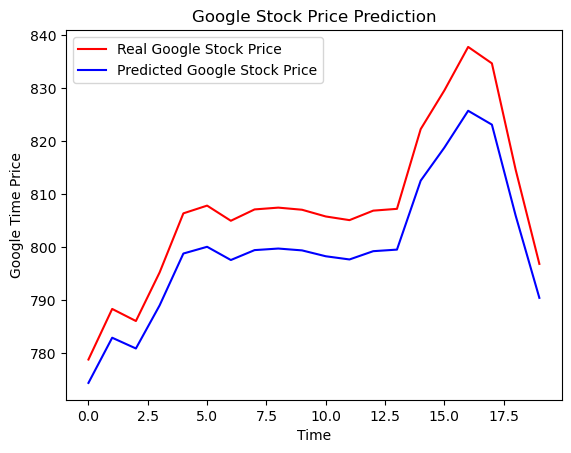

In [13]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

In [14]:
real_stock_price = pd.read_csv("Google_Stock_Price_Train.csv")
real_stock_price = real_stock_price.iloc[:,1:2].values

In [15]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

40/40 [==============================] - 0s 5ms/step


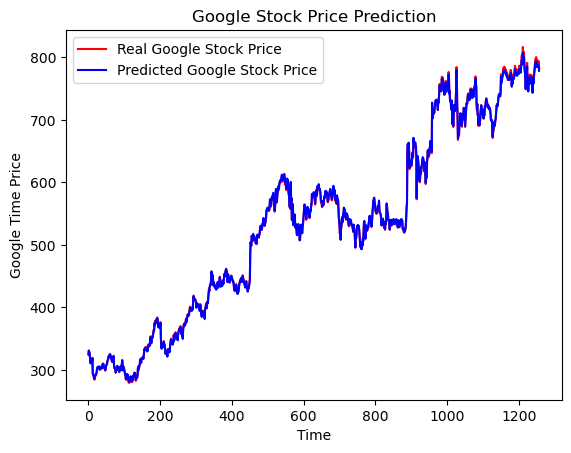

In [16]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()